In [8]:
from openmc_plasma_source import TokamakSource
from openmc_plasma_source import plotting as ops_plt
import matplotlib.pyplot as plt
import math


In [9]:
import openmc
openmc.config['cross_sections']='/home/rifat/endfb-viii.0-hdf5/cross_sections.xml'

def make_materials_geometry_tallies(enrichment,percentage,material_id_start=1):
 materials = openmc.Materials()
 mat_id = material_id_start
 plasma = openmc.Material(material_id_start,"plasma")
 plasma.add_nuclide('H2', 1.0)
 plasma.add_nuclide('H3', 1.0)
 plasma.set_density('g/cm3', 1e-5)
 materials.append(plasma)
 mat_id += 1
 # === FIRST WALLS AND W ARMOR ===
 def make_first_wall(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 8.7 * 0.05 + 100 * 0.66 * 0.95, 'wo')
    mat.add_element('Fe', 89.66 * 0.34 * 0.95, 'wo')
    mat.add_element('Cr', 8.0 * 0.34 * 0.95, 'wo')
    mat.add_element('W', 91.3 * 0.05 + 2.0 * 0.34 * 0.95, 'wo')
    mat.add_element('C', 0.1 * 0.34 * 0.95, 'wo')
    mat.add_element('V', 0.2 * 0.34 * 0.95, 'wo')
    mat.add_element('Ta', 0.04 * 0.34 * 0.95, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    mat_id += 1
    return mat

 materials.append(make_first_wall("inboard_first_wall"))
 materials.append(make_first_wall("outboard_first_wall"))

 # === BLANKETS ===
 def make_blanket(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Li', percentage, enrichment_target='Li6', enrichment=enrichment, percent_type='wo')
    mat.add_element('Th', 73.4789-percentage*0.997, 'wo')
    mat.add_nuclide('U233',0.2211-percentage*0.003,'wo')
    mat.add_element('C', 1.17, 'wo')
    mat.add_element('Si', 2.73, 'wo')
    mat.add_element('Cr', 0.7875, 'wo')
    mat.add_element('Fe', 6.6975, 'wo')
    mat.add_element('He', 14.9, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.52)
    mat_id += 1
    return mat

 materials.append(make_blanket("inboard_blanket"))
 materials.append(make_blanket("outboard_blanket"))

 # === BACK WALL ===
 def make_back_wall(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id,name)
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.80, 'wo')
    mat.add_element('Cr', 8.0 * 0.80, 'wo')
    mat.add_element('W', 2.0 * 0.80, 'wo')
    mat.add_element('C', 0.1 * 0.80, 'wo')
    mat.add_element('V', 0.2 * 0.80, 'wo')
    mat.add_element('Ta', 0.04 * 0.80, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    mat_id += 1
    return mat

 materials.append(make_back_wall("back_wall"))

 # === HELIUM MANIFOLDS ===
 def make_He_manifold(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 70.0, 'wo')
    mat.add_element('Fe', 26.7, 'wo')
    mat.add_element('Cr', 2.55, 'wo')
    mat.add_element('W', 0.6, 'wo')
    mat.add_element('V', 0.06, 'wo')
    mat.add_element('Ta', 0.015, 'wo')
    mat.add_element('C', 0.03, 'wo')
    mat.add_element('Mn', 0.15, 'wo')
    mat.add_element('Si', 0.06, 'wo')
    mat.add_element('N', 0.006, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.015, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.544)
    mat_id += 1
    return mat

 materials.append(make_He_manifold("inboard_He_manifolds"))
 materials.append(make_He_manifold("outboard_He_manifolds"))

 # === STRUCTURAL RINGS ===
 def make_structural_ring(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.28, 'wo')
    mat.add_element('Cr', 8.0 * 0.28, 'wo')
    mat.add_element('W', 2.0 * 0.28, 'wo')
    mat.add_element('C', 0.1 * 0.28, 'wo')
    mat.add_element('V', 0.2 * 0.28, 'wo')
    mat.add_element('Ta', 0.04 * 0.28, 'wo')
    mat.add_element('Fe', 90.0 * 0.52, 'wo')
    mat.add_element('Cr', 9.0 * 0.52, 'wo')
    mat.add_element('B', 0.005 * 0.52, 'wo')
    mat.add_element('C', 0.1 * 0.52, 'wo')
    mat.add_element('Mn', 0.3 * 0.52, 'wo')
    mat.add_element('Si', 0.2 * 0.52, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.28)
    mat_id += 1
    return mat

 materials.append(make_structural_ring("inboard_structural_ring"))
 materials.append(make_structural_ring("outboard_structural_ring"))

 # === VACUUM VESSEL ===
 def make_vacuum_vessel(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 40.0, 'wo')
    mat.add_element('Fe', 55.98, 'wo')
    mat.add_element('Cr', 1.8, 'wo')
    mat.add_element('W', 1.2, 'wo')
    mat.add_element('V', 0.12, 'wo')
    mat.add_element('Ta', 0.03, 'wo')
    mat.add_element('C', 0.06, 'wo')
    mat.add_element('Mn', 0.18, 'wo')
    mat.add_element('Si', 0.12, 'wo')
    mat.add_element('N', 0.012, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.048, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 4.5)
    mat_id += 1
    return mat

 materials.append(make_vacuum_vessel("inboard_vv"))
 materials.append(make_vacuum_vessel( "outboard_vv"))

 # === SHIELD ===
 def make_shield(name):  
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 89.66 * 0.39, 'wo')
    mat.add_element('Cr', 8.0 * 0.39, 'wo')
    mat.add_element('W', 2.0 * 0.39, 'wo')
    mat.add_element('C', 0.1 * 0.39, 'wo')
    mat.add_element('V', 0.2 * 0.39, 'wo')
    mat.add_element('Ta', 0.04 * 0.39, 'wo')
    mat.add_element('Fe', 90.0 * 0.29, 'wo')
    mat.add_element('Cr', 9.0 * 0.29, 'wo')
    mat.add_element('B', 0.005 * 0.29, 'wo')
    mat.add_element('C', 0.1 * 0.29, 'wo')
    mat.add_element('Mn', 0.3 * 0.29, 'wo')
    mat.add_element('Si', 0.2 * 0.29, 'wo')
    mat.add_element('H', 2.0 * 0.32, 'wo')
    mat.add_element('O', 16.0 * 0.32, 'wo')
    mat.add_s_alpha_beta('c_H_in_H2O')
    mat.set_density('g/cm3', 5.658)
    mat_id += 1
    return mat

 materials.append(make_shield("inboard_shield"))
 materials.append(make_shield("outboard_shield"))
 
 # === COIL CASE & CENTRAL SOLENOID ===
 def center_solenoid(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Nb', 3.0)
    mat.add_element('Sn', 1.0)
    mat.set_density('g/cm3', 8.74)
    mat_id += 1
    return mat
 materials.append(center_solenoid('central_solenoid'))
  
 def make_coil_case(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 64.995, 'wo')
    mat.add_element('Cr', 17.5, 'wo')
    mat.add_element('Ni', 12.0, 'wo')
    mat.add_element('Mo', 2.5, 'wo')
    mat.add_element('Mn', 2.0, 'wo')
    mat.add_element('Si', 0.75, 'wo')
    mat.add_element('C', 0.08, 'wo')
    mat.add_element('N', 0.10, 'wo')
    mat.add_element('P', 0.045, 'wo')
    mat.add_element('S', 0.03, 'wo')
    mat.set_density('g/cm3', 7.98)
    mat_id += 1
    return mat

 materials.append(make_coil_case("inner_coil_case"))
 materials.append(make_coil_case("outer_coil_case"))

 def make_winding_pack(name):
    nonlocal mat_id
    winding_pack = openmc.Material(mat_id ,name)
    winding_pack.add_element('Fe', 89.5 * 0.30, 'wo')
    winding_pack.add_element('Cr', 9.0 * 0.30, 'wo')
    winding_pack.add_element('Mo', 1.0 * 0.30, 'wo')
    winding_pack.add_element('W', 0.5 * 0.30, 'wo')
    winding_pack.add_element('C', 0.05 * 0.30, 'wo')
    winding_pack.add_element('Cu', 25.0, 'wo')
    winding_pack.add_element('Nb', 70.1 * 0.25, 'wo')
    winding_pack.add_element('Sn', 29.9 * 0.25, 'wo')
    winding_pack.add_element('Si', 60.0 * 0.10, 'wo')
    winding_pack.add_element('O', 60.0 * 0.10, 'wo')
    winding_pack.add_element('C', 40.0 * 0.10, 'wo')
    winding_pack.add_element('He', 10.0, 'wo')
    winding_pack.set_density('g/cm3', 5.82)
    mat_id+=1
    return winding_pack
 materials.append(make_winding_pack("winding_pack"))

 def mat_thermal_shield(name):
    nonlocal mat_id
    thermal_shield = openmc.Material(mat_id,name)
    thermal_shield.add_element('Be', 100.0 * 0.30, 'wo')
    thermal_shield.add_element('Fe', 87.0 * 0.30, 'wo')
    thermal_shield.add_element('Cr', 8.0 * 0.30, 'wo')
    thermal_shield.add_element('W', 2.0 * 0.30 + 100.0 * 0.10, 'wo')
    thermal_shield.add_element('V', 2.0 * 0.30, 'wo')
    thermal_shield.add_element('C', 1.0 * 0.30 + 100.0 * 0.20 + 30.0 * 0.10, 'wo')
    thermal_shield.add_element('Mn', 0.8 * 0.30, 'wo')
    thermal_shield.add_element('Si', 0.2 * 0.30 + 70.0 * 0.10, 'wo')
    thermal_shield.set_density('g/cm3', 5.3494)
    mat_id+=1
    return thermal_shield
 materials.append(mat_thermal_shield("thermal_shield"))

 # === EXPORT ===
 materials.export_to_xml()
 dag_univ = openmc.DAGMCUniverse(filename="/home/rifat/codes/FNSF_Li+Th/fnsf_reactor.h5m")
 bbox = dag_univ.bounding_box
 dagmc_radius = max(abs(bbox[0][0]), abs(bbox[0][1]), abs(bbox[1][0]), abs(bbox[1][1]))

 cylinder_surface = openmc.ZCylinder(r=dagmc_radius, boundary_type="vacuum", surface_id=1000)
 lower_z = openmc.ZPlane(bbox[0][2], boundary_type="vacuum", surface_id=1003)
 upper_z = openmc.ZPlane(bbox[1][2], boundary_type="vacuum", surface_id=1004)

 # this is the surface along the side of the 180 degree model
 side_surface = openmc.YPlane(y0=0, boundary_type="reflective", surface_id=1001)

 wedge_region = -cylinder_surface & +lower_z & -upper_z & +side_surface

 # bounding cell is a wedge shape filled with the DAGMC universe
 bounding_cell = openmc.Cell(fill=dag_univ, cell_id=1000, region=wedge_region)
 my_plasma = TokamakSource(
    elongation=2.2,
    ion_density_centre=1.6e20,
    ion_density_pedestal=1e20,
    ion_density_peaking_factor=1.52,
    ion_density_separatrix=0.56e20,
    ion_temperature_centre=22,
    ion_temperature_pedestal=4,
    ion_temperature_separatrix=0.1,
    ion_temperature_peaking_factor=2.25,
    ion_temperature_beta=7,
    major_radius=480,
    minor_radius=120,
    pedestal_radius=114,
    mode="H",
    shafranov_factor=0.144,
    triangularity=0.625,
    sample_size=50000,
 ) 
 plasma = my_plasma.make_openmc_sources()

 # bound_dag_univ = dag_univ.bounded_universe()
 geometry = openmc.Geometry([bounding_cell])
 geometry.export_to_xml()
 settings=openmc.Settings()
 settings.run_mode="fixed source"
 settings.batches=50
 settings.particles=10000
 settings.source=plasma
 tallies=openmc.Tallies()
 openmc.reset_auto_ids()

 tbr_tally = openmc.Tally(name="tbr",tally_id=4)
 tbr_tally.scores = ["(n,Xt)"]
 tbr_tally.nuclides=['Li6','Li7']
 tallies.append(tbr_tally)

 mat_filter=openmc.MaterialFilter([4,5])
 heating_tally=openmc.Tally(name="heating")
 heating_tally.scores=['heating']
 heating_tally.filters=[mat_filter]
 tallies.append(heating_tally)

 fission_tally=openmc.Tally(name='fission')
 fission_tally.filters=[mat_filter]
 fission_tally.scores=['fission']
 tallies.append(fission_tally)

 import numpy as np
 
 # builds the openmc model
 model = openmc.Model(
    materials=materials, geometry=geometry, settings=settings, tallies=tallies
 )
 
 sp_filename=model.run(threads=16)
 sp = openmc.StatePoint(sp_filename)

 tbr_tally = sp.get_tally(name='tbr')

 tdf = tbr_tally.get_pandas_dataframe()

 tbr_tally_result = tdf['mean'].sum()
 tbr_tally_std_dev = tdf['std. dev.'].sum()

 li_6_contributions = tdf[tdf['nuclide'] == 'Li6']['mean'].sum()
 li_7_contributions = tdf[tdf['nuclide'] == 'Li7']['mean'].sum()
 li_6_std = tdf[tdf['nuclide'] == 'Li6']['std. dev.'].sum()
 li_7_std = tdf[tdf['nuclide'] == 'Li7']['std. dev.'].sum()

 heating=sp.get_tally(name='heating')
 hdf=heating.get_pandas_dataframe()
 heating_result=hdf['mean'].sum()
 heating_std_dev=hdf['std. dev.'].sum()

 fission=sp.get_tally(name='fission')
 fission_rate=fission.mean.sum()
 fission_std_dev=fission.std_dev.sum()

 M_values = (fission_rate * 200 + 4.784 * li_6_contributions - 2.467 * li_7_contributions + 1) / 14.1
 M_std = np.sqrt((200 * fission_std_dev)**2 + (4.784 * li_6_std)**2 + (2.467 * li_7_std)**2) / 14.1

 return {'enrichment': enrichment,
  'percentage':percentage,
   'tbr_tally_result': tbr_tally_result,
  'tbr_tally_std_dev': tbr_tally_std_dev,
   'heating_result': heating_result,
  'heating_std_dev': heating_std_dev,
   'M_values':M_values,
  'M_std':M_std
  }

In [10]:

results = []
for enrichment in [0.1, 10,20,30,40,50,60,70,80,90,100]:
 for percentage in [14.74,29.48,44.22,58.96,73.6]:
    results.append(make_materials_geometry_tallies(enrichment,percentage))



/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:150: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** 2)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:190: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** self.ion_temperature_beta)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/stats/univariate.py:757: FutureWarning: The Muir(...) class has been replaced by the muir(...) function and will be removed in a future version of OpenMC. Use muir(...) instead.
  warn(


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [11]:
import json

# Save
with open("saved_value.json", "w") as f:
    json.dump({"results": results}, f)






In [1]:
# Load
import json
with open("saved_value.json", "r") as f:
    data = json.load(f)
    result = data["results"]

In [2]:
import pandas as pd
df=pd.DataFrame(result)
print(df)

    enrichment  percentage  tbr_tally_result  tbr_tally_std_dev  \
0          0.1       14.74          0.318160           0.000764   
1          0.1       29.48          0.541742           0.001107   
2          0.1       44.22          0.719020           0.001611   
3          0.1       58.96          0.875899           0.001753   
4          0.1       73.60          1.107711           0.001838   
5         10.0       14.74          0.927746           0.001478   
6         10.0       29.48          1.098453           0.001727   
7         10.0       44.22          1.185651           0.001892   
8         10.0       58.96          1.238259           0.001996   
9         10.0       73.60          1.276531           0.002239   
10        20.0       14.74          1.020149           0.001999   
11        20.0       29.48          1.139992           0.001948   
12        20.0       44.22          1.196070           0.002058   
13        20.0       58.96          1.230348           0.00197

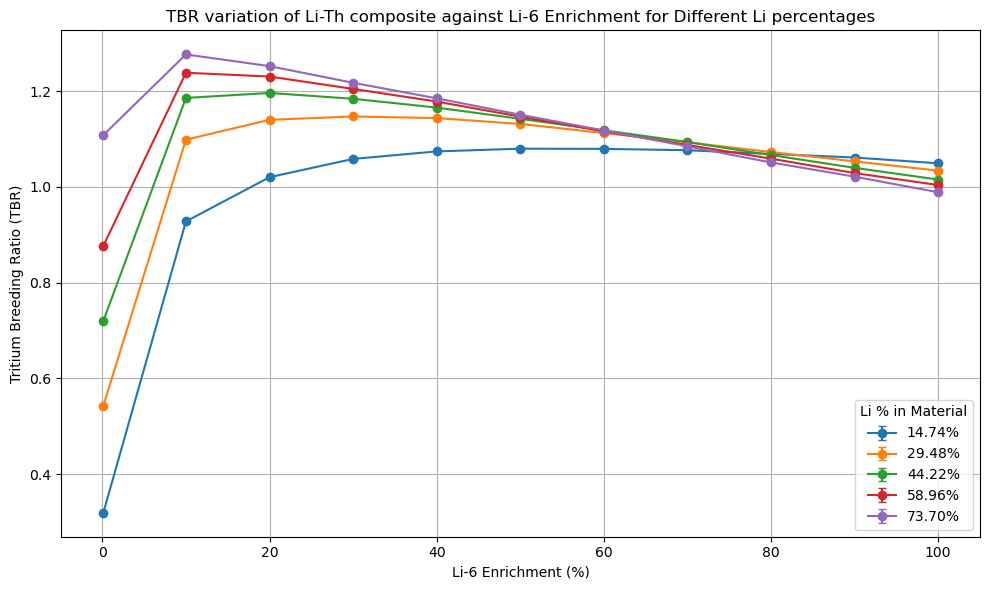

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame as `df`
# Li percentages in order per enrichment value (5 per enrichment)
li_percentages = [14.74, 29.48, 44.22, 58.96, 73.7]

# Add a 'li_percentage' column by repeating the list for each enrichment level
df['li_percentage'] = li_percentages * (len(df) // 5)

# Group and plot
plt.figure(figsize=(10, 6))
for pct in sorted(df['li_percentage'].unique()):
    subdf = df[df['li_percentage'] == pct]
    plt.errorbar(
        subdf['enrichment'], 
        subdf['tbr_tally_result'], 
        yerr=subdf['tbr_tally_std_dev'],
        label=f'{pct:.2f}%', 
        marker='o', 
        capsize=3
    )

# Plot styling
plt.xlabel("Li-6 Enrichment (%)")
plt.ylabel("Tritium Breeding Ratio (TBR)")
plt.title("TBR variation of Li-Th composite against Li-6 Enrichment for Different Li percentages")
plt.legend(title="Li % in Material")
plt.grid(True)
plt.tight_layout()
plt.savefig('tbr_variation of Li-Th.png',dpi=2000)
plt.show()


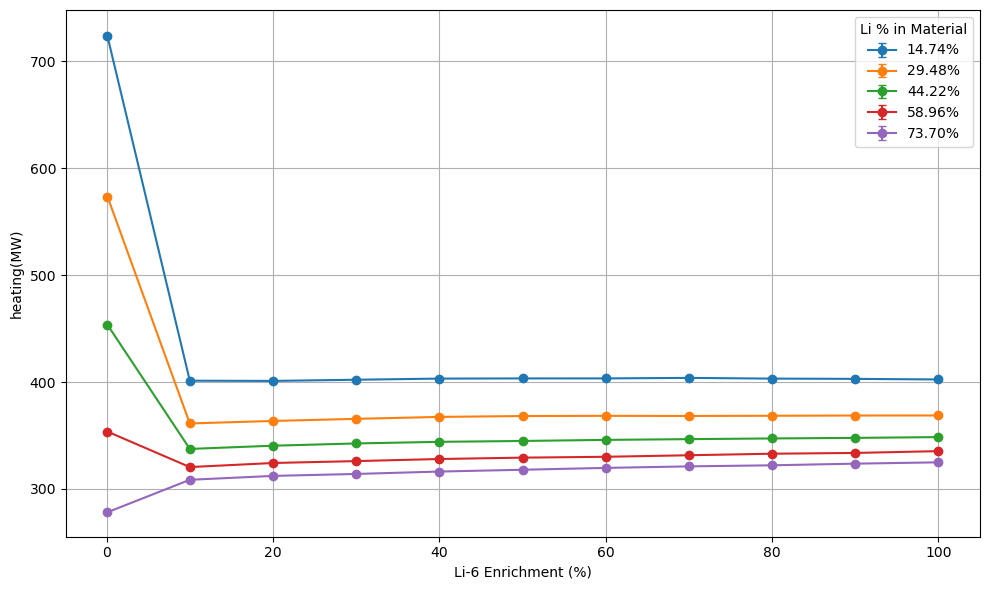

In [4]:
source_density=518*1e6/(17.6e6*1.6e-19)

# Li percentages in order per enrichment value (5 per enrichment)
li_percentages = [14.74, 29.48, 44.22, 58.96, 73.7]

# Add a 'li_percentage' column by repeating the list for each enrichment level
df['li_percentage'] = li_percentages * (len(df) // 5)

# Group and plot
plt.figure(figsize=(10, 6))
for pct in sorted(df['li_percentage'].unique()):
    subdf = df[df['li_percentage'] == pct]
    plt.errorbar(
        subdf['enrichment'],
        subdf['heating_result'] *source_density * 1.6e-19/1e6,
        yerr=subdf['heating_std_dev'] *source_density * 1.6e-19/1e6, 
        label=f'{pct:.2f}%', 
        marker='o', 
        capsize=3
    )

# Plot styling
plt.xlabel("Li-6 Enrichment (%)")
plt.ylabel("heating(MW)")
plt.legend(title="Li % in Material")
plt.grid(True)
plt.tight_layout()
plt.savefig('heating_variation of Li-Th.png',dpi=1200)
plt.show()



In [5]:
import pandas as pd

# Example data – replace with your actual values


# Create DataFrame
df = pd.DataFrame(result)

# Normalize TBR and Heating (higher is better)
df['TBR_norm'] = (df['tbr_tally_result'] - df['tbr_tally_result'].min()) / (df['tbr_tally_result'].max() - df['tbr_tally_result'].min())
df['Heating_norm'] = (df['heating_result'] - df['heating_result'].min()) / (df['heating_result'].max() - df['heating_result'].min())

# Set weights for scoring
w_tbr = 0.5       # weight for TBR
w_heat = 0.5    # weight for heating

# Compute performance score
df['Score'] = w_tbr * df['TBR_norm'] + w_heat * df['Heating_norm']
df['heating_result_converted'] = df['heating_result'] * source_density * 1.6e-25
# Sort by score descending
df_sorted = df.sort_values(by='Score', ascending=False)

# Print ranked results
print("Ranked performance by enrichment level:")
print(df_sorted)


Ranked performance by enrichment level:
    enrichment  percentage  tbr_tally_result  tbr_tally_std_dev  \
25        50.0       14.74          1.079690           0.001794   
30        60.0       14.74          1.079284           0.001521   
35        70.0       14.74          1.076467           0.001558   
20        40.0       14.74          1.073970           0.001924   
9         10.0       73.60          1.276531           0.002239   
40        80.0       14.74          1.068676           0.001749   
21        40.0       29.48          1.143585           0.002052   
16        30.0       29.48          1.146898           0.001901   
12        20.0       44.22          1.196070           0.002058   
45        90.0       14.74          1.061212           0.001685   
13        20.0       58.96          1.230348           0.001978   
8         10.0       58.96          1.238259           0.001996   
14        20.0       73.60          1.252118           0.002064   
15        30.0       1

Ranked performance by enrichment level:
    enrichment  percentage  tbr_tally_result  tbr_tally_std_dev  \
25        50.0       14.74          1.079690           0.001794   
30        60.0       14.74          1.079284           0.001521   
35        70.0       14.74          1.076467           0.001558   
20        40.0       14.74          1.073970           0.001924   
9         10.0       73.60          1.276531           0.002239   
40        80.0       14.74          1.068676           0.001749   
21        40.0       29.48          1.143585           0.002052   
16        30.0       29.48          1.146898           0.001901   
12        20.0       44.22          1.196070           0.002058   
45        90.0       14.74          1.061212           0.001685   
13        20.0       58.96          1.230348           0.001978   
8         10.0       58.96          1.238259           0.001996   
14        20.0       73.60          1.252118           0.002064   
15        30.0       1

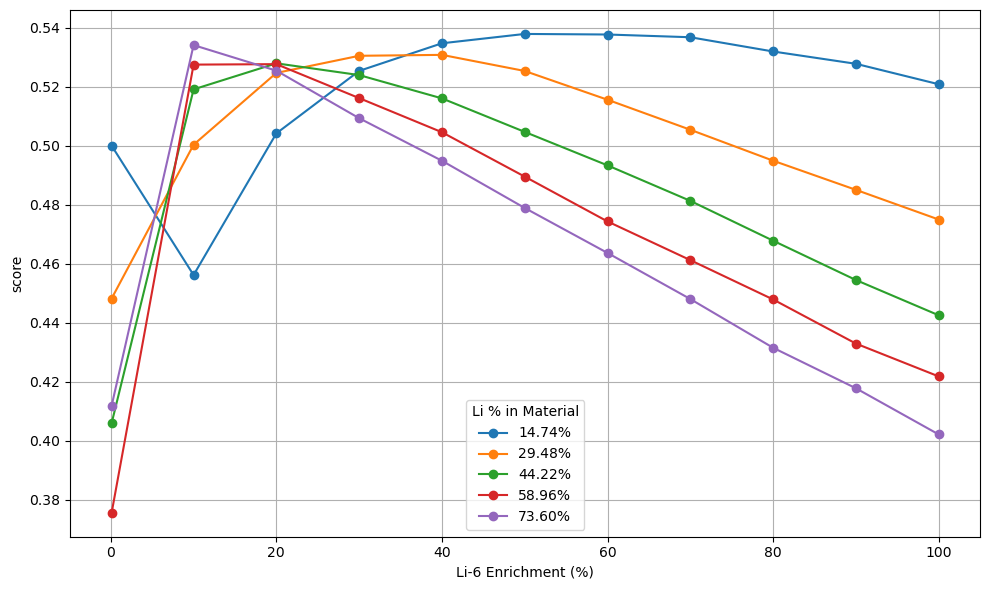

In [8]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(result)


# Normalize TBR and Heating (higher is better)
df['TBR_norm'] = (df['tbr_tally_result'] - df['tbr_tally_result'].min()) / (df['tbr_tally_result'].max() - df['tbr_tally_result'].min())
df['Heating_norm'] = (df['heating_result'] - df['heating_result'].min()) / (df['heating_result'].max() - df['heating_result'].min())

# Set weights for scoring
w_tbr = 0.5  
w_heat = 0.5      

# Compute performance score
df['Score'] = w_tbr * df['TBR_norm'] + w_heat * df['Heating_norm']

# Convert heating to power (W)
df['heating_result_converted'] = df['heating_result'] * source_density * 1.6e-25

# Sort by score descending
df_sorted = df.sort_values(by='Score', ascending=False)

# Print ranked results
print("Ranked performance by enrichment level:")
print(df_sorted)

plt.figure(figsize=(10, 6))
for pct in sorted(df['percentage'].unique()):
    subdf = df[df['percentage'] == pct]
    plt.plot(
        subdf['enrichment'],
        subdf['Score'],
        label=f'{pct:.2f}%',
        marker='o'
    )

plt.xlabel("Li-6 Enrichment (%)")
plt.ylabel("score")
plt.legend(title="Li % in Material")
plt.grid(True)
plt.tight_layout()
plt.savefig('Li-Th TBR-power performance score.png',dpi=2000)
plt.show()

In [18]:
df.to_csv("tbr_heating_results.csv", index=False)
